<a href="https://colab.research.google.com/github/aliciasimmons/ASL-data-science-and-analytics/blob/main/Copy_of_11_9_2_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.9.2 Activity

Customer Segmentation

You work for a large retailer that has collected customer data on sex, marital status, age, income, education, and occupation through a customer loyalty program.

The marketing department tasks you with defining groups of “similar” customers that it can use as the basis for new marketing campaigns.


In this module, we'll cluster our customer data by building a dendrogram.

#Step 1: Download and save the `segmentation data.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `segmentation data.csv` dataset by running the following code block 

* When prompted, navigate to and select the `segmentation data.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

from google.colab import files
segmentation = files.upload()

Saving segmentation data.csv to segmentation data.csv


#Step 3: Import necessary packages

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
```

In [13]:
#Step 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `X`.
* Print the first five observations of `X`.  Note the kinds of data it contains.

In [14]:
#Step 4
X = pd.read_csv('segmentation data.csv')

X.head(5)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#Step 5: Select Important Features
* Select the important features to be used in the clustering algorithm.  Hint: There is one feature that is probably *not* helpful and should be dropped.

In [15]:
#Step 5
# id is not useful

X.drop(columns=["ID"], axis=1,inplace=True)

X.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


#Step 6: Pre-processing

* You can use the following code to one-hot-encode the categorical features:

```
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)
```

* You can use the following code to scale the quantitative features:

```
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])
```

In [16]:
#Step 6
categorical_cols = ['Sex','Marital status', 'Education', 'Occupation', 'Settlement size']

X = pd.get_dummies(X, columns = categorical_cols)



In [17]:
ss = StandardScaler()

X[['Age', 'Income']] = ss.fit_transform(X[['Age', 'Income']])

#Step 7: Plot a dendrogram of the customer segmentation data
* Run the following code block to plot a dendrogram of the customer segmentation data.
* In the K-Means activity, we found that there might be eight clusters of customers represented in the data.  What can we say about the optimal number of clusters based on the dendrogram?

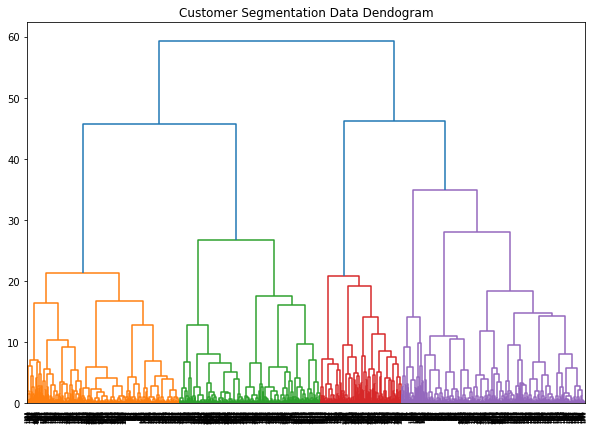

In [18]:
#Step 7

plt.figure(figsize=(10, 7))
plt.title("Customer Segmentation Data Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

**Step 7 Answer:**


#Step 8: Plot the clusters using agglomerative clustering
* Again, we can't plot all of our features against the predicted clusters because there are just too many.  
* Run the following code block to create a scatterplot each participant's age and income colored by the cluster they were assigned to.
* Remember that the clusters may appear to overlap because they are being separated by other features, like sex and marital status, that aren't being shown on the graph.
* What do you observe about how customers are being clustered?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


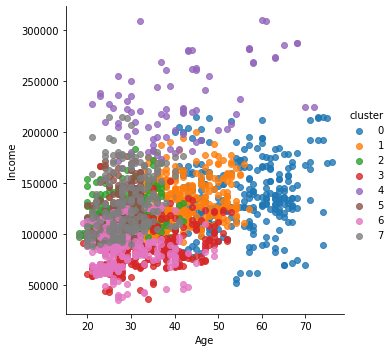

In [19]:
#Step 8

# labels_ are assigned to every observation based on the cluster the observation is assigned to


cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(X)
labels = pd.DataFrame(labels_)

# cluster_centers_ give coordinated of the cluster centroid across every feature
labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = pd.read_csv('segmentation data.csv')
graph = pd.concat([X_orig,labels], axis=1)

sns.lmplot('Age','Income', data=graph, hue='cluster', fit_reg=False)

**Step 8 Answer:**

